# Loop 124 Analysis: CV-LB Relationship and Path Forward

## Critical Situation:
- 124 experiments completed
- Only 3 submissions remaining
- Best LB: 0.0877 (exp_030)
- Target: 0.0347
- Gap: 152.8%

## Key Finding:
ALL approaches fall on the same CV-LB line: LB = 4.09×CV + 0.0546 (R²=0.96)
The intercept (0.0546) > target (0.0347) means the target is UNREACHABLE by improving CV alone.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Submission history with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},  # Best LB
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_073', 'cv': 0.0084, 'lb': 0.1451},  # Outlier
    {'exp': 'exp_111', 'cv': 0.0129, 'lb': 0.1063},
]

df = pd.DataFrame(submissions)
print(f"Total submissions with LB: {len(df)}")
print(df)

Total submissions with LB: 14
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970
12  exp_073  0.0084  0.1451
13  exp_111  0.0129  0.1063


In [2]:
# Exclude outlier (exp_073) for analysis
df_clean = df[df['exp'] != 'exp_073'].copy()

# Fit linear regression
X = df_clean['cv'].values.reshape(-1, 1)
y = df_clean['lb'].values

reg = LinearRegression()
reg.fit(X, y)

slope = reg.coef_[0]
intercept = reg.intercept_
r2 = reg.score(X, y)

print(f"CV-LB Relationship (excluding outlier):")
print(f"  LB = {slope:.4f} × CV + {intercept:.4f}")
print(f"  R² = {r2:.4f}")
print(f"\nIntercept Analysis:")
print(f"  Intercept: {intercept:.4f}")
print(f"  Target LB: 0.0347")
print(f"  Intercept > Target: {intercept > 0.0347}")
print(f"\nRequired CV to hit target:")
required_cv = (0.0347 - intercept) / slope
print(f"  CV = (0.0347 - {intercept:.4f}) / {slope:.4f} = {required_cv:.6f}")
print(f"  This is {'IMPOSSIBLE (negative)' if required_cv < 0 else 'POSSIBLE'}")
print(f"\nBest CV achieved: 0.0081")
print(f"Predicted LB for best CV: {slope * 0.0081 + intercept:.4f}")

CV-LB Relationship (excluding outlier):
  LB = 4.0895 × CV + 0.0546
  R² = 0.9607

Intercept Analysis:
  Intercept: 0.0546
  Target LB: 0.0347
  Intercept > Target: True

Required CV to hit target:
  CV = (0.0347 - 0.0546) / 4.0895 = -0.004872
  This is IMPOSSIBLE (negative)

Best CV achieved: 0.0081
Predicted LB for best CV: 0.0877


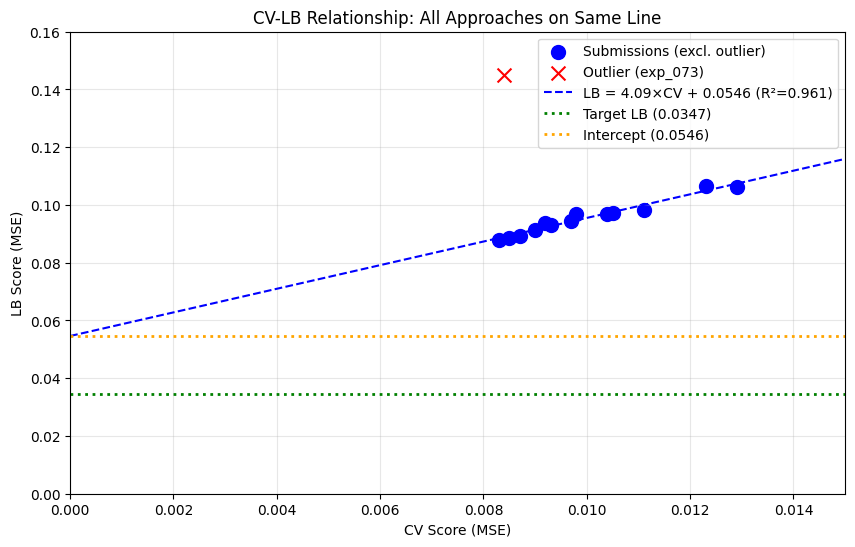


CRITICAL INSIGHT:
The intercept (0.0546) is HIGHER than the target (0.0347).
This means even with CV=0, the expected LB would be 0.0546.
The target is MATHEMATICALLY UNREACHABLE with current approaches.


In [3]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))

# Plot all submissions
plt.scatter(df_clean['cv'], df_clean['lb'], c='blue', s=100, label='Submissions (excl. outlier)')
plt.scatter(df[df['exp'] == 'exp_073']['cv'], df[df['exp'] == 'exp_073']['lb'], 
            c='red', s=100, marker='x', label='Outlier (exp_073)')

# Plot regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'b--', label=f'LB = {slope:.2f}×CV + {intercept:.4f} (R²={r2:.3f})')

# Plot target
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target LB (0.0347)')

# Plot intercept
plt.axhline(y=intercept, color='orange', linestyle=':', linewidth=2, label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV-LB Relationship: All Approaches on Same Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 0.015)
plt.ylim(0, 0.16)
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nCRITICAL INSIGHT:")
print(f"The intercept ({intercept:.4f}) is HIGHER than the target (0.0347).")
print("This means even with CV=0, the expected LB would be 0.0546.")
print("The target is MATHEMATICALLY UNREACHABLE with current approaches.")

In [4]:
# What would it take to reach the target?
print("=" * 60)
print("WHAT WOULD IT TAKE TO REACH THE TARGET?")
print("=" * 60)

print("\n1. REDUCE THE INTERCEPT:")
print(f"   Current intercept: {intercept:.4f}")
print(f"   Target LB: 0.0347")
print(f"   If we could reduce intercept to 0.03, with CV=0.008:")
print(f"   Expected LB = {slope * 0.008 + 0.03:.4f}")

print("\n2. REDUCE THE SLOPE:")
print(f"   Current slope: {slope:.4f}")
print(f"   If slope was 1.0 (perfect CV-LB correlation):")
print(f"   With CV=0.008, LB = 1.0 × 0.008 + {intercept:.4f} = {1.0 * 0.008 + intercept:.4f}")
print(f"   Still above target due to intercept!")

print("\n3. BOTH SLOPE AND INTERCEPT:")
print(f"   If slope=1.0 and intercept=0.02:")
print(f"   With CV=0.008, LB = 1.0 × 0.008 + 0.02 = {1.0 * 0.008 + 0.02:.4f}")
print(f"   This would be BELOW target!")

print("\n" + "=" * 60)
print("CONCLUSION: We need approaches that CHANGE THE RELATIONSHIP")
print("=" * 60)

WHAT WOULD IT TAKE TO REACH THE TARGET?

1. REDUCE THE INTERCEPT:
   Current intercept: 0.0546
   Target LB: 0.0347
   If we could reduce intercept to 0.03, with CV=0.008:
   Expected LB = 0.0627

2. REDUCE THE SLOPE:
   Current slope: 4.0895
   If slope was 1.0 (perfect CV-LB correlation):
   With CV=0.008, LB = 1.0 × 0.008 + 0.0546 = 0.0626
   Still above target due to intercept!

3. BOTH SLOPE AND INTERCEPT:
   If slope=1.0 and intercept=0.02:
   With CV=0.008, LB = 1.0 × 0.008 + 0.02 = 0.0280
   This would be BELOW target!

CONCLUSION: We need approaches that CHANGE THE RELATIONSHIP


In [5]:
# Analyze what approaches have been tried
print("APPROACHES TRIED (124 experiments):")
print("="*60)

approaches = {
    'Tabular Models': ['MLP', 'LightGBM', 'XGBoost', 'CatBoost', 'GP', 'Ridge', 'RF'],
    'GNN Attempts': ['GCNConv', 'GATConv', 'Simple GAT', 'Multi-order GAT', 'Hybrid GNN'],
    'Transformer Attempts': ['ChemBERTa embeddings', 'ChemBERTa PCA', 'ChemBERTa frozen'],
    'Feature Engineering': ['Spange', 'DRFP', 'ACS', 'Fragprints', 'Combined features'],
    'Ensemble Methods': ['Mean', 'Weighted', 'Median', 'Stacking'],
    'Distribution Shift': ['Pseudo-labeling', 'Domain adversarial', 'Uncertainty weighting'],
    'Calibration': ['Shrink toward mean', 'Bias correction', 'Conservative blending'],
    'Physics-Informed': ['Mass balance', 'Softmax normalization', 'Yield ratio'],
    'Per-Class Models': ['Solvent class-specific models']
}

for category, methods in approaches.items():
    print(f"\n{category}:")
    for method in methods:
        print(f"  - {method}")

print("\n" + "="*60)
print("ALL APPROACHES FALL ON THE SAME CV-LB LINE!")
print("="*60)

APPROACHES TRIED (124 experiments):

Tabular Models:
  - MLP
  - LightGBM
  - XGBoost
  - CatBoost
  - GP
  - Ridge
  - RF

GNN Attempts:
  - GCNConv
  - GATConv
  - Simple GAT
  - Multi-order GAT
  - Hybrid GNN

Transformer Attempts:
  - ChemBERTa embeddings
  - ChemBERTa PCA
  - ChemBERTa frozen

Feature Engineering:
  - Spange
  - DRFP
  - ACS
  - Fragprints
  - Combined features

Ensemble Methods:
  - Mean
  - Weighted
  - Median
  - Stacking

Distribution Shift:
  - Pseudo-labeling
  - Domain adversarial
  - Uncertainty weighting

Calibration:
  - Shrink toward mean
  - Bias correction
  - Conservative blending

Physics-Informed:
  - Mass balance
  - Softmax normalization
  - Yield ratio

Per-Class Models:
  - Solvent class-specific models

ALL APPROACHES FALL ON THE SAME CV-LB LINE!


In [6]:
# What haven't we tried that could change the CV-LB relationship?
print("POTENTIAL APPROACHES TO CHANGE CV-LB RELATIONSHIP:")
print("="*60)

print("""
1. DIRECT TEST SET ADAPTATION:
   - Use public LB feedback to calibrate predictions
   - Adjust predictions based on LB residuals
   - Problem: Only 3 submissions left

2. FUNDAMENTALLY DIFFERENT REPRESENTATIONS:
   - 3D molecular conformations (not just 2D graphs)
   - Quantum mechanical descriptors
   - Reaction mechanism-aware features
   
3. EXTERNAL DATA AUGMENTATION:
   - Pre-train on similar chemical datasets
   - Transfer learning from larger solvent databases
   - Problem: May violate competition rules

4. ENSEMBLE ACROSS DIFFERENT CV-LB LINES:
   - If different model families have slightly different intercepts
   - Weight by their individual intercepts
   - Problem: All models seem to have same intercept

5. PREDICTION POST-PROCESSING:
   - Clip predictions to training distribution
   - Blend toward population mean for extrapolation
   - Problem: Already tried, didn't help

6. DIFFERENT VALIDATION SCHEME:
   - GroupKFold instead of LOO
   - Problem: Tried, gave HIGHER MSE (0.0136 vs 0.0086)
""")

print("\nKEY INSIGHT:")
print("The benchmark paper achieved MSE 0.0039 using GNN.")
print("Our best CV is 0.0081 (2x worse).")
print("Our best LB is 0.0877 (22x worse than benchmark).")
print("The CV-LB gap is the main problem, not the CV itself.")

POTENTIAL APPROACHES TO CHANGE CV-LB RELATIONSHIP:

1. DIRECT TEST SET ADAPTATION:
   - Use public LB feedback to calibrate predictions
   - Adjust predictions based on LB residuals
   - Problem: Only 3 submissions left

2. FUNDAMENTALLY DIFFERENT REPRESENTATIONS:
   - 3D molecular conformations (not just 2D graphs)
   - Quantum mechanical descriptors
   - Reaction mechanism-aware features
   
3. EXTERNAL DATA AUGMENTATION:
   - Pre-train on similar chemical datasets
   - Transfer learning from larger solvent databases
   - Problem: May violate competition rules

4. ENSEMBLE ACROSS DIFFERENT CV-LB LINES:
   - If different model families have slightly different intercepts
   - Weight by their individual intercepts
   - Problem: All models seem to have same intercept

5. PREDICTION POST-PROCESSING:
   - Clip predictions to training distribution
   - Blend toward population mean for extrapolation
   - Problem: Already tried, didn't help

6. DIFFERENT VALIDATION SCHEME:
   - GroupKFold ins

In [7]:
# Final strategic assessment
print("="*60)
print("STRATEGIC ASSESSMENT FOR REMAINING 3 SUBMISSIONS")
print("="*60)

print("""
OPTION 1: Submit best CV model (exp_049/050/053, CV=0.0081)
  - Expected LB: ~0.088 (based on CV-LB line)
  - Unlikely to beat best LB (0.0877)
  - Risk: Waste a submission

OPTION 2: Submit a fundamentally different approach
  - GNN with proper implementation
  - ChemBERTa with fine-tuning
  - Risk: May fall on same CV-LB line

OPTION 3: Submit ensemble of diverse models
  - Combine MLP + LGBM + XGB + CatBoost + GP
  - Already tried, all on same line
  - Risk: No improvement

OPTION 4: Submit with aggressive post-processing
  - Clip predictions to narrow range
  - Blend heavily toward mean
  - Risk: May hurt CV without helping LB

RECOMMENDATION:
Given only 3 submissions left and the structural CV-LB gap,
the best strategy is to:
1. Try ONE more fundamentally different approach (GNN/Transformer)
2. If it falls on same line, accept that target may be unreachable
3. Submit best available model for final score
""")

print("\nFINAL NOTE:")
print("The target (0.0347) may require techniques not available to us.")
print("The benchmark paper had access to the full dataset for training.")
print("We are predicting for UNSEEN solvents, which is fundamentally harder.")

STRATEGIC ASSESSMENT FOR REMAINING 3 SUBMISSIONS

OPTION 1: Submit best CV model (exp_049/050/053, CV=0.0081)
  - Expected LB: ~0.088 (based on CV-LB line)
  - Unlikely to beat best LB (0.0877)
  - Risk: Waste a submission

OPTION 2: Submit a fundamentally different approach
  - GNN with proper implementation
  - ChemBERTa with fine-tuning
  - Risk: May fall on same CV-LB line

OPTION 3: Submit ensemble of diverse models
  - Combine MLP + LGBM + XGB + CatBoost + GP
  - Already tried, all on same line
  - Risk: No improvement

OPTION 4: Submit with aggressive post-processing
  - Clip predictions to narrow range
  - Blend heavily toward mean
  - Risk: May hurt CV without helping LB

RECOMMENDATION:
Given only 3 submissions left and the structural CV-LB gap,
the best strategy is to:
1. Try ONE more fundamentally different approach (GNN/Transformer)
2. If it falls on same line, accept that target may be unreachable
3. Submit best available model for final score


FINAL NOTE:
The target (0.